# Weather Analysis and Temperature Prediction Project 

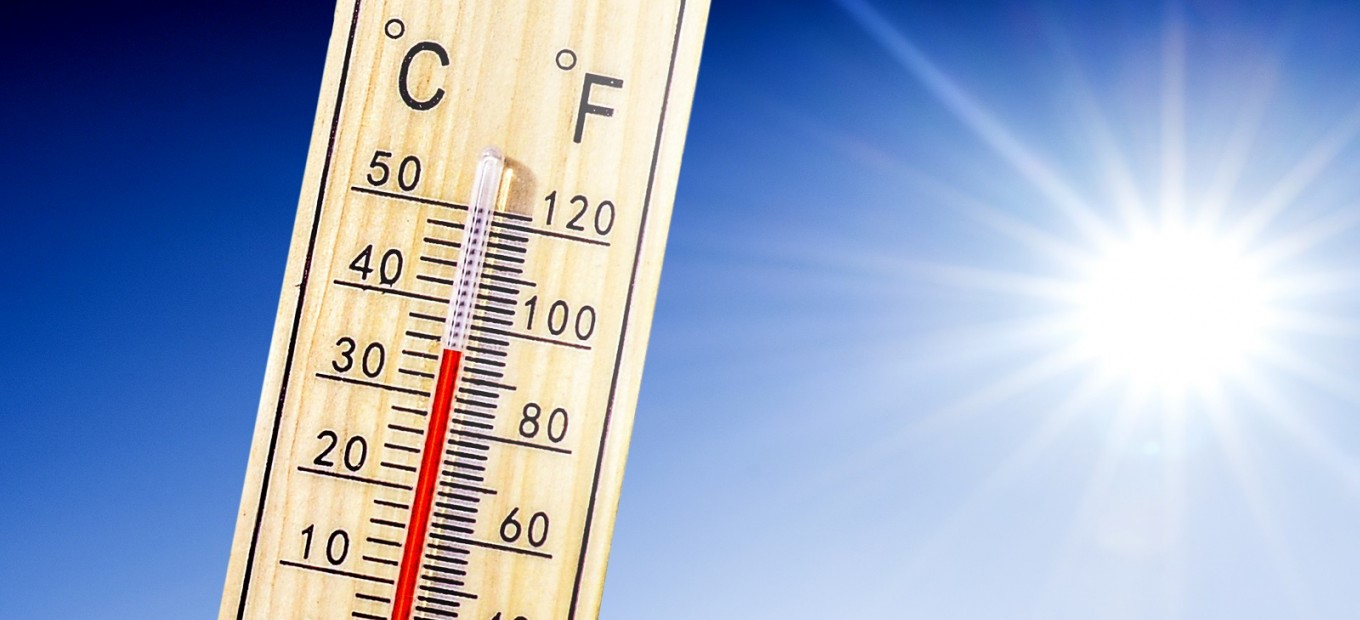

Dataset  

    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017
    Based on the relevant features, machine learning models can be built for prediction of minimum temperature for the next day and the maximum temperature for the next day (regression problems).
    
Dataset link- https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv

Input features

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9


Output label  

1. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
2. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


Aim:

    Develop a machine learning model for the prediction of minimum temperature for the next day and the maximum temperature for the next day (regression problems).

In [182]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import re
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [183]:
# load data

temp=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Data pre-processing & EDA

In [184]:
# create a copy of original dataset for cleaning and analysis

temp_df=temp.copy()

In [185]:
temp_df.shape

(7752, 25)

In [186]:
# check for duplicates

duplicates=temp_df.duplicated()

print('No. of duplicates in the dataset: ', temp_df.duplicated().sum())
print('Index of duplicates in the dataset: ', temp_df[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [187]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [188]:
# check for nulls

temp_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [189]:
temp_df[temp_df['LDAPS_Tmax_lapse'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,10-08-2013,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,10-08-2013,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,10-08-2013,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,10-08-2013,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,10-08-2013,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,20-08-2016,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,20-08-2016,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,20-08-2016,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,20-08-2016,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


Observation:

    Several records contain a significant number of null values across multiple columns. So we can drop the nulls all together using dropna()

In [190]:
# we can drop the records having nulls

temp_df=temp_df.dropna()
temp_df.shape

(7588, 25)

In [191]:
# check number of unique values in each column

unique=temp_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
station,25
Date,307
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7585
LDAPS_RHmax,7577
LDAPS_Tmax_lapse,7588
LDAPS_Tmin_lapse,7588
LDAPS_WS,7588
LDAPS_LH,7588


In [192]:
# take the count of each unique value in each column

for i in temp_df.columns:
    print(temp_df.value_counts(temp_df[i]),'\n')

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64 

Date
01-07-2013    25
20-07-2015    25
20-08-2017    25
20-08-2015    25
20-08-2014    25
              ..
23-08-2017    22
24-07-2015    22
06-07-2017    22
13-08-2015    22
30-06-2017    16
Name: count, Length: 307, dtype: int64 

Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.7      1
20.4      1
20.3      1
37.6      1
Name: count, Length: 167, dtype: int64 

Present_Tmin
24.0    160
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
14.3      1
14.2      1
14.1      1
13.6      1
29.9      1
Name: count, Length: 155, dtype: int64 

LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
19

In [193]:
# change datatype of 'date' to 'datetime'

temp_df['Date']=pd.to_datetime(temp_df['Date'])

In [194]:
# generate year, month, day columns from 'date' column

temp_df['date'],temp_df['month'],temp_df['year']=temp_df['Date'].dt.day, temp_df['Date'].dt.month,temp_df['Date'].dt.year
temp_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [195]:
# check the descriptive statistics of the dataset

temp_df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year
count,7588.000000,7588,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,2015-07-27 18:22:12.208750592,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,15.939510,7.465999,2014.991697
min,1.000000,2013-06-30 00:00:00,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,2014-07-15 00:00:00,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,2015-07-29 00:00:00,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,2016-08-14 00:00:00,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,2017-08-30 00:00:00,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000
std,7.217858,NaN,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.906521,0.528635,1.410877


Observation:

    There are 25 stations from which the data was collected
    Data was collected from 2013 to 2017
    Average max air temperature recorded was 29.7°C
    Average min air temperature recorded was 23.1°C
    

In [196]:
# join latitude and longitude to get the location coordinates together in a single column

temp_df['loc_coord']= temp_df['lat'].astype(str) + ',' + temp_df['lon'].astype(str)
temp_df.head(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year,loc_coord
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013,"37.6046,126.991"
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013,"37.6046,127.032"


In [197]:
temp_df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'date',
       'month', 'year', 'loc_coord'],
      dtype='object')

In [198]:
# combine the average cloud cover columns of 4 periods to a single column

temp_df['cc']=(temp_df['LDAPS_CC1']+temp_df['LDAPS_CC2']+temp_df['LDAPS_CC3']+temp_df['LDAPS_CC4'])/4
temp_df['cc'][:5]

0    0.182617
1    0.191113
2    0.203257
3    0.184445
4    0.187579
Name: cc, dtype: float64

In [199]:
# combine the average precipitation columns of 4 periods to a single column

temp_df['ppt']=(temp_df['LDAPS_PPT1']+temp_df['LDAPS_PPT2']+temp_df['LDAPS_PPT3']+temp_df['LDAPS_PPT4'])/4
temp_df['ppt'][:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ppt, dtype: float64

In [200]:
# drop the individual columns used to combine cc and ppt

temp_df.drop(['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],
             axis=1, inplace=True)

In [201]:
temp_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year,loc_coord,cc,ppt
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,2.7850,5992.895996,29.1,21.2,30,6,2013,"37.6046,126.991",0.182617,0.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.5141,5869.312500,30.5,22.5,30,6,2013,"37.6046,127.032",0.191113,0.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.2661,5863.555664,31.1,23.9,30,6,2013,"37.5776,127.058",0.203257,0.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,2.5348,5856.964844,31.7,24.3,30,6,2013,"37.645,127.022",0.184445,0.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.5055,5859.552246,31.2,22.5,30,6,2013,"37.5507,127.135",0.187579,0.0


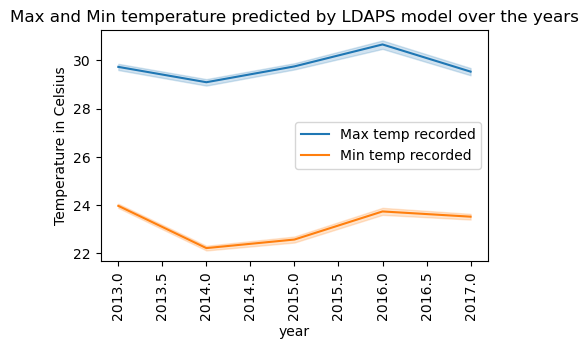

In [202]:
# Max and Min temperature predicted by LDAPS model over the years

plt.figure(figsize=(5,3))
sns.lineplot(x='year',y='Present_Tmax',data=temp_df,label='Max temp recorded')
sns.lineplot(x='year',y='Present_Tmin',data=temp_df,palette='rocket',label='Min temp recorded')
plt.title('Max and Min temperature predicted by LDAPS model over the years')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=90)
plt.show()

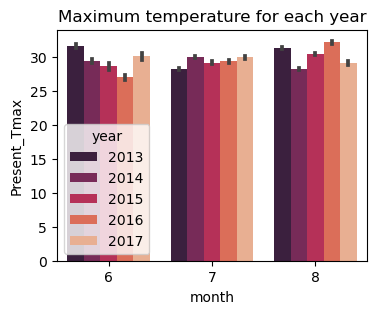

In [203]:
plt.figure(figsize=(4,3))
sns.barplot(x='month',y='Present_Tmax',hue='year',data=temp_df,palette='rocket')
plt.title('Maximum temperature for each year')
plt.show()

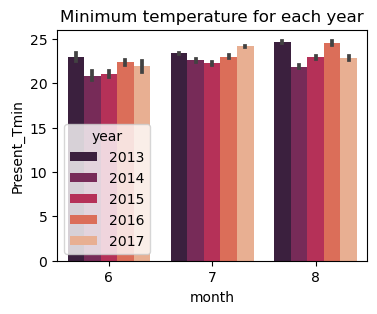

In [204]:
plt.figure(figsize=(4,3))
sns.barplot(x='month',y='Present_Tmin',hue='year',data=temp_df,palette='rocket')
plt.title('Minimum temperature for each year')
plt.show()

Observation:

    Over the years, maximum temperature was recorded on August,2016 and minimum on June, 2014

In [205]:
# average temp, relative humidity, wind speed, latent heat flux , cloud cover, precipitation and solar radiation for the hottest period

max_temp=temp_df[(temp_df['month']==8) & (temp_df['year']==2016)]
cols=max_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS','LDAPS_LH','cc','ppt','Solar radiation']].columns
for i in cols:
    print(f'Average {i} for the hottest year (August, 2016) is {max_temp[i].mean()}')

Average Present_Tmax for the hottest year (August, 2016) is 32.14047287899861
Average Present_Tmin for the hottest year (August, 2016) is 24.574965229485397
Average LDAPS_RHmin for the hottest year (August, 2016) is 51.57060349677329
Average LDAPS_RHmax for the hottest year (August, 2016) is 85.09968953126565
Average LDAPS_WS for the hottest year (August, 2016) is 6.888194772159944
Average LDAPS_LH for the hottest year (August, 2016) is 73.5514398892726
Average cc for the hottest year (August, 2016) is 0.26442103780598053
Average ppt for the hottest year (August, 2016) is 0.23309074577190542
Average Solar radiation for the hottest year (August, 2016) is 4941.712984361613


In [206]:
# average temp, relative humidity, wind speed, latent heat flux , cloud cover, precipitation and solar radiation for the coolest period

min_temp=temp_df[(temp_df['month']==6) & (temp_df['year']==2014)]
cols=min_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_WS','LDAPS_LH','cc','ppt','Solar radiation']].columns
for i in cols:
    print(f'Average {i} for the coolest year (June 2014) is {min_temp[i].mean()}')

Average Present_Tmax for the coolest year (June 2014) is 29.48
Average Present_Tmin for the coolest year (June 2014) is 20.872
Average LDAPS_RHmin for the coolest year (June 2014) is 40.839628754
Average LDAPS_RHmax for the coolest year (June 2014) is 83.8310635376
Average LDAPS_WS for the coolest year (June 2014) is 6.1232724878800004
Average LDAPS_LH for the coolest year (June 2014) is 60.7462736412
Average cc for the coolest year (June 2014) is 0.07593914417
Average ppt for the coolest year (June 2014) is 0.007275733430000001
Average Solar radiation for the coolest year (June 2014) is 5874.689628919999


Observations:
    
        August,2016 (Hottest temperature recorded):
    
        Average temperature ranged from 24.57°C to 32.14°C
        Average humidity predicted by LDAPS for next day ranged from 51.57 to 85.09%    
        Average wind speed was 6.88 m/s

        Average latent heat flux was 73.55 W/m2
        Average cloud cover throughout the month was 26.4%
        Average precipitation throughout the month was 23.3%
        Average Solar radiation recieved was 4941.71 wh/m2
        
        

       June, 2014 (Coolest temperature recorded):

        Average temperature ranged from 20.87°C to 29.48°C
        Average humidity predicted by LDAPS for next day ranged from 40.83 to 83.83%    
        Average wind speed was 6.12 m/s
        Average latent heat flux was 60.74 W/m2
        Average cloud cover throughout the month was 7.59%
        Average precipitation throughout the month was 0.72%
        Average Solar radiation recieved was 5874.68 wh/m2

In [207]:
# Record where highest temperature was recorded

temp_df[temp_df['Present_Tmax']==temp_df['Present_Tmax'].max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year,loc_coord,cc,ppt
5717,18.0,2016-08-11,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,...,1.2313,5082.563477,37.0,27.8,11,8,2016,"37.4832,127.024",0.079451,0.0


Observation:

    Highest temp of '37.6°C' was recorded at station '18' on 11-08-2016.
    Minimum temperature of the day was '26.8°C'
    Location co-ordinates of the area/station which recorded the highest temperature is 37.4832,127.024 and the slope of the station is 1.2313 Â°
    Average cloud cover was 31.75% and average precipitation was 0.0 indicating no rainfall on 11-08-2016

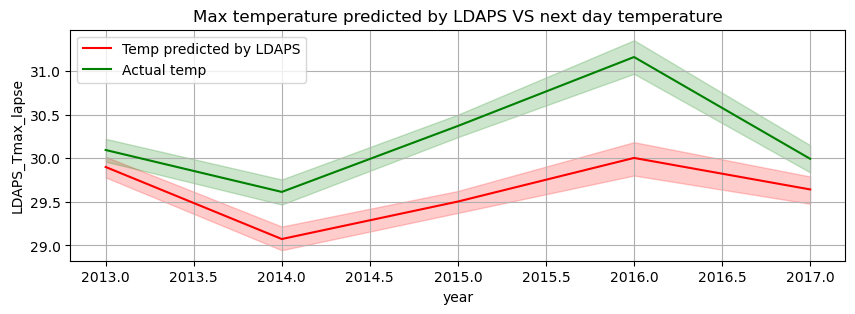

In [208]:
plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='LDAPS_Tmax_lapse',data=temp_df,color='red',label='Temp predicted by LDAPS')
sns.lineplot(x='year',y='Next_Tmax',data=temp_df,color='green',label='Actual temp')
plt.title('Max temperature predicted by LDAPS VS next day temperature')
plt.grid(True)
plt.show()

Observation:

    The temperature forecasted by the LDAPS model was close to the actual temperature recorded during 2013-2014 and later started varying. Much difference was recorded in 201-2016 and it almost started stabilizing by the beginning of 2017.

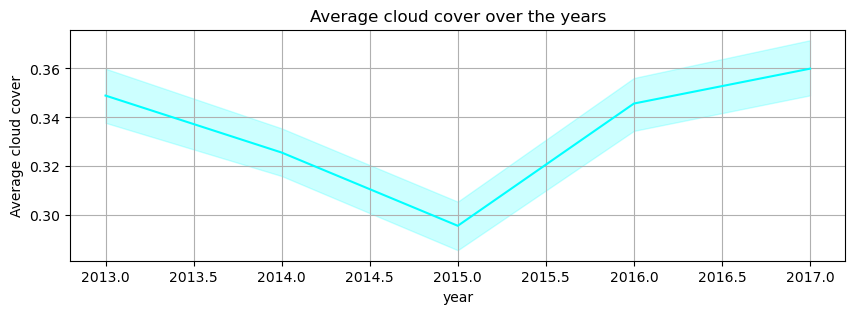

In [209]:
# visualise average cloud cover over the years

plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='cc',data=temp_df,color='cyan')
plt.ylabel('Average cloud cover')
plt.title('Average cloud cover over the years')
plt.grid(True)
plt.show()

Observation:

    Average cloud cover forecasted by LDAPS model was highest in 2017 and lowest in 2015

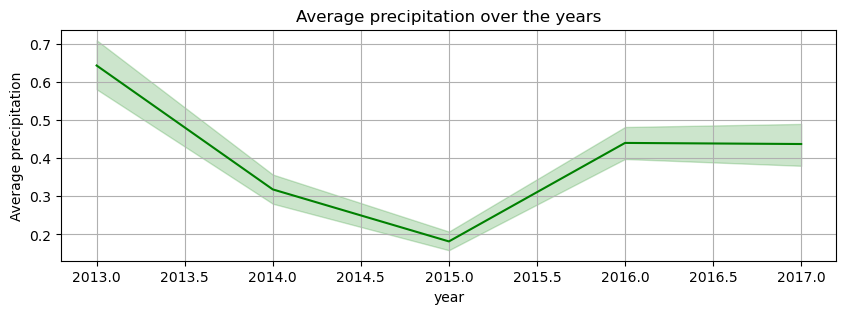

In [210]:
# visualise average precipitation over the years

plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='ppt',data=temp_df,color='green')
plt.ylabel('Average precipitation')
plt.title('Average precipitation over the years')
plt.grid(True)
plt.show()

Observation:

    Average precipitation forecasted by LDAPS model was highest in 2013 and lowest in 2015

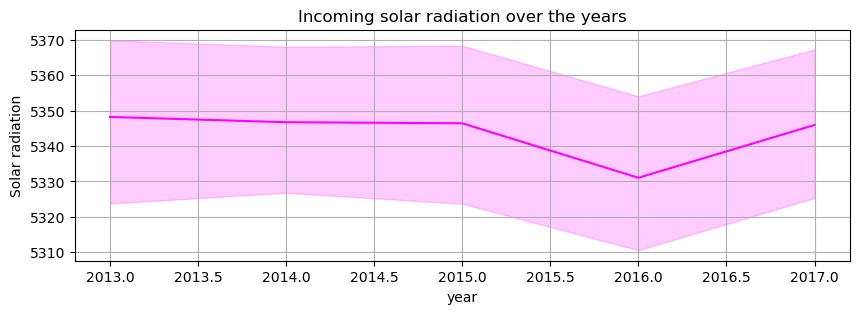

In [211]:
# visualise solar radiation over the years

plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='Solar radiation',data=temp_df,color='magenta')
plt.title('Incoming solar radiation over the years')
plt.grid(True)
plt.show()

Observation:

    Solar radiation was alomst equally recieved across the years except during 2015 it started declining and 2016 recieved the lowest radiation

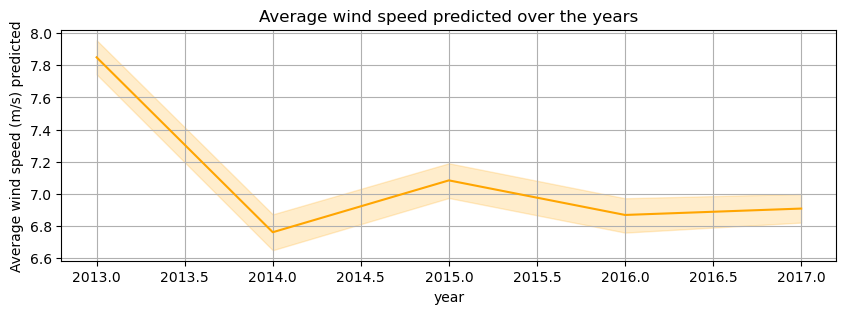

In [212]:
# visualise LDAPS predicted average wind speed (m/s) for next day over the years

plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='LDAPS_WS',data=temp_df,color='orange')
plt.ylabel('Average wind speed (m/s) predicted')
plt.title('Average wind speed predicted over the years')
plt.grid(True)
plt.show()

Observation:

    Wind speed was highest in 2013 after which there was a steep decline in 2014

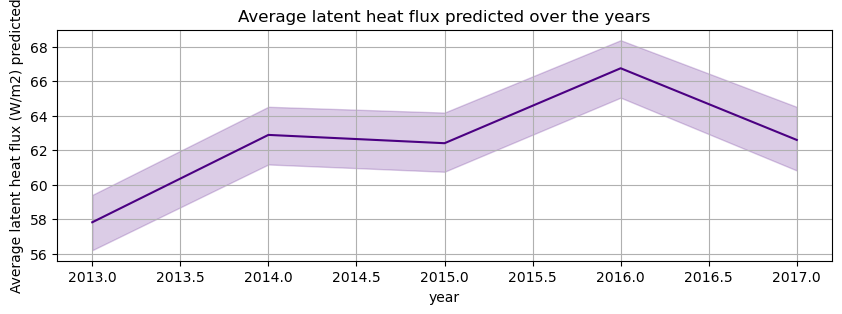

In [213]:
# visualise LDAPS predicted average latent heat flux (W/m2) for next day over the years

plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='LDAPS_LH',data=temp_df,color='indigo')
plt.ylabel('Average latent heat flux (W/m2) predicted')
plt.title('Average latent heat flux predicted over the years')
plt.grid(True)
plt.show()

Observation:

    Latent heat flux was least in 2013 and peaked during 2016

In [214]:
temp_df.select_dtypes(include=['object']).columns

Index(['loc_coord'], dtype='object')

In [215]:
# encode 'loc_coord' column

le=LabelEncoder()
temp_df['loc_coord']=le.fit_transform(temp_df['loc_coord'])

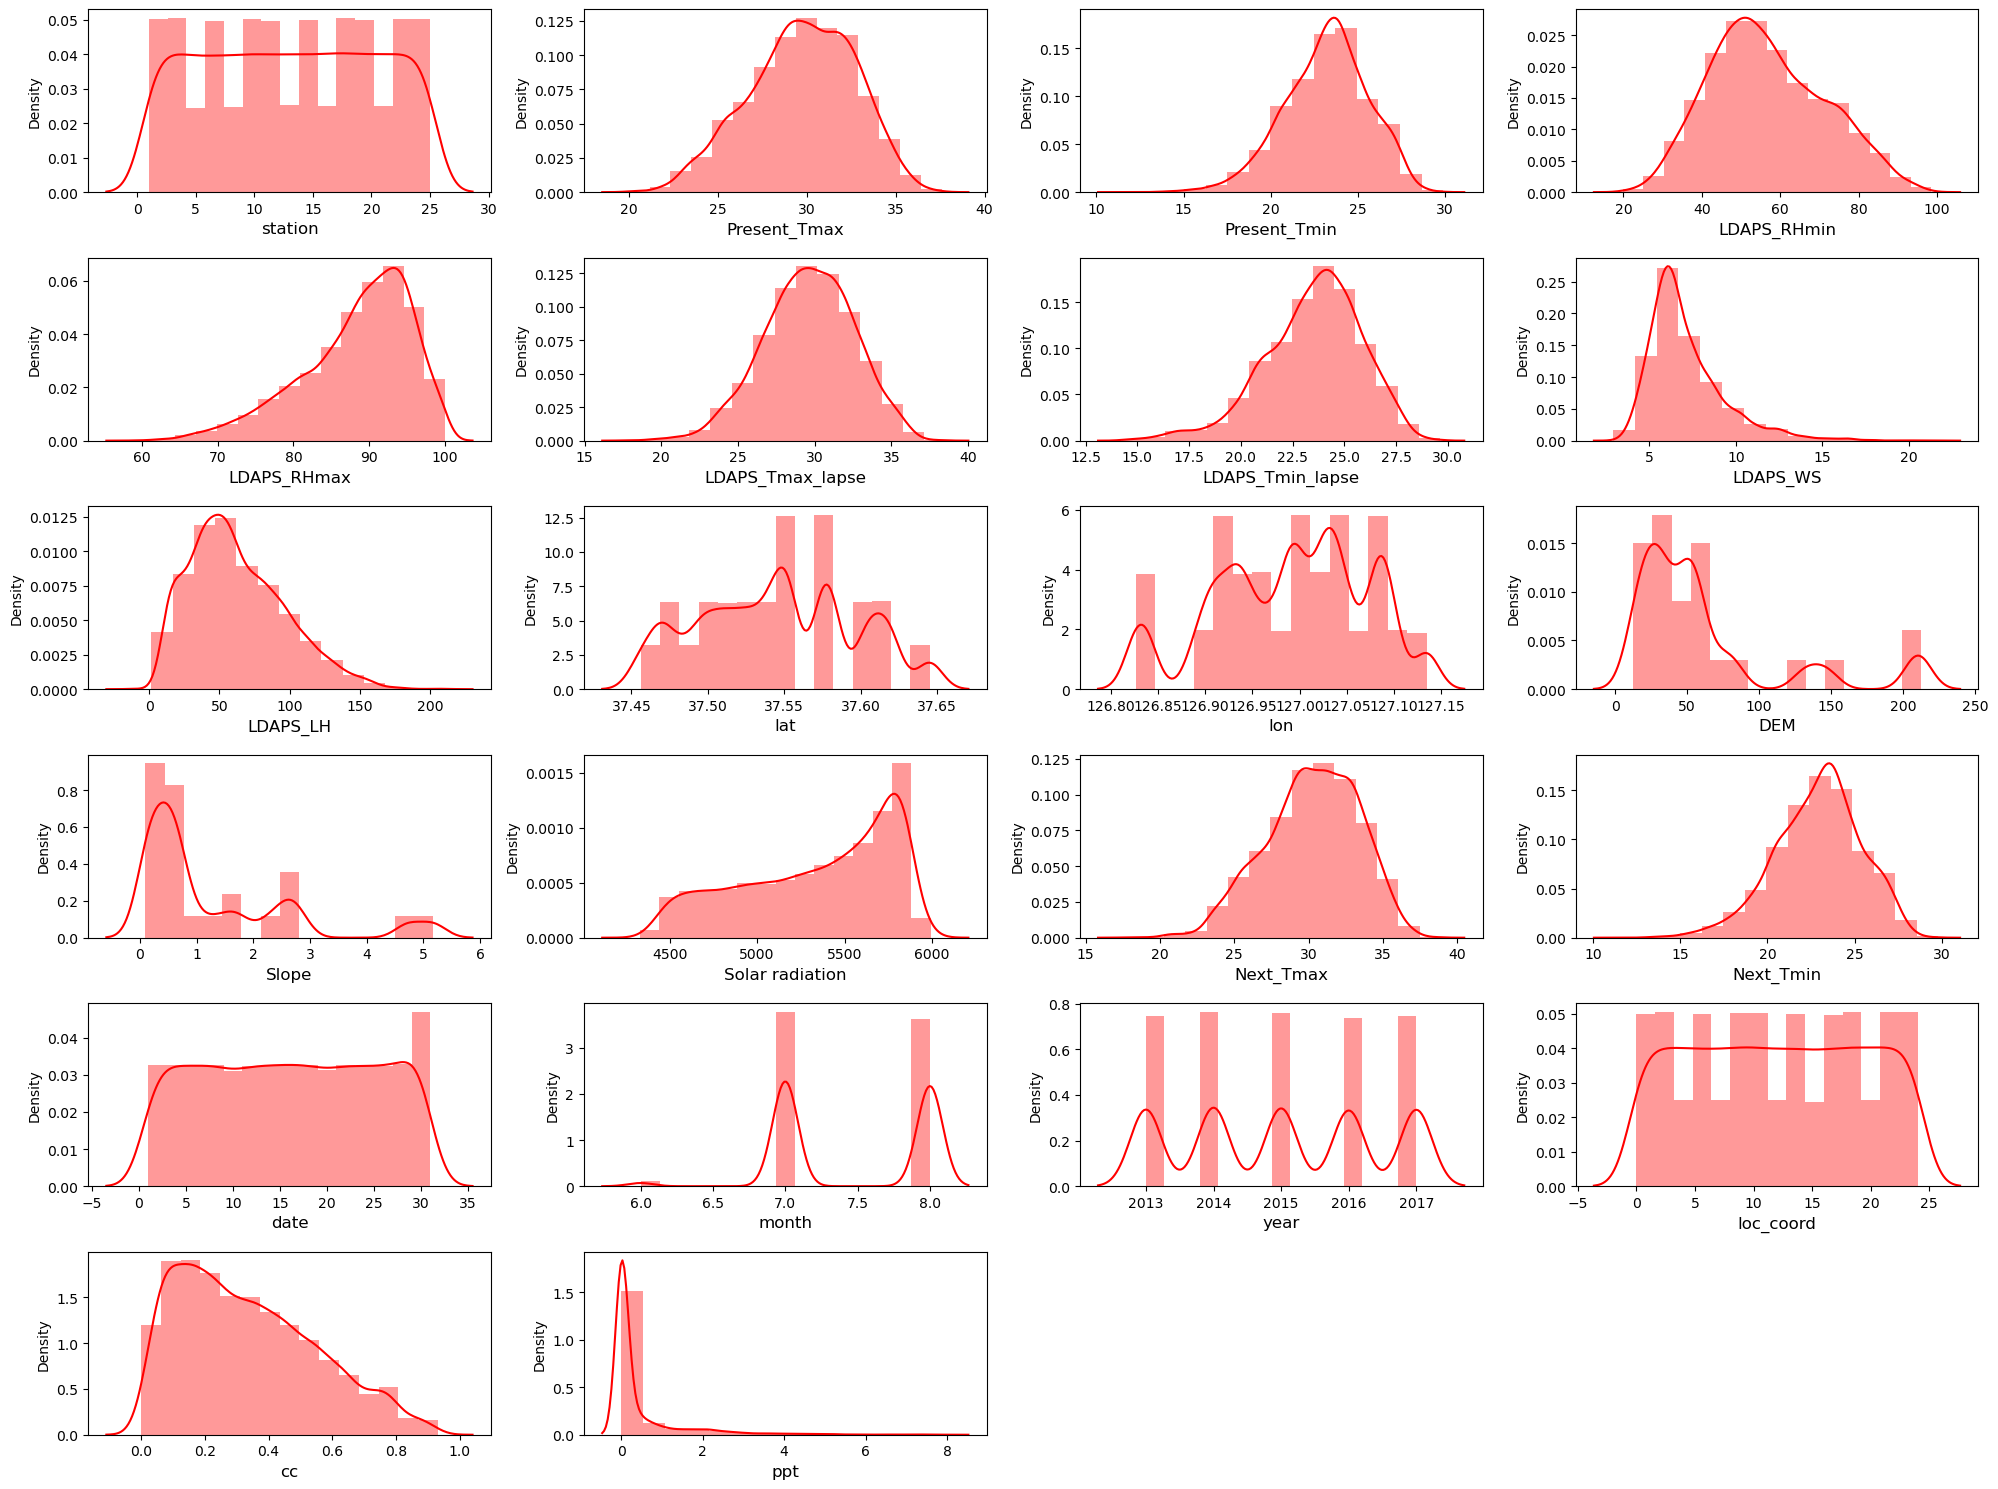

In [216]:
# check data distribution

num=temp_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=23:
        ax=plt.subplot(6,4,plot)
        sns.distplot(temp_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:

    There is significant left skewness in ppt column and small left skewness in DEM, Slope and LDAPS_WS as evident from the graph. Skewness can be quantified using skew()

In [217]:
# check skewness 

num.skew().sort_values(ascending=False)

ppt                 3.488632
DEM                 1.721617
Slope               1.559050
LDAPS_WS            1.553926
LDAPS_LH            0.662971
cc                  0.550277
LDAPS_RHmin         0.301396
lat                 0.085377
year                0.013575
loc_coord          -0.000789
station            -0.004178
date               -0.010718
month              -0.174856
LDAPS_Tmax_lapse   -0.222349
Present_Tmax       -0.257069
lon                -0.289048
Next_Tmax          -0.334842
Present_Tmin       -0.353822
Next_Tmin          -0.393662
Solar radiation    -0.524325
LDAPS_Tmin_lapse   -0.574035
LDAPS_RHmax        -0.845264
dtype: float64

In [219]:
# reduce skewness in ppt, DEM, Slope and LDAPS_WS

for col in ['ppt', 'DEM', 'Slope', 'LDAPS_WS']:
    temp_df[col]=np.cbrt(temp_df[col])
    
num=temp_df.select_dtypes(include=['int','float'])

print('Skewness of data after cuberoot transformation: \n',num.skew().sort_values(ascending=False))

Skewness of data after cuberoot transformation: 
 LDAPS_WS            0.675385
LDAPS_LH            0.662971
DEM                 0.584270
cc                  0.550277
LDAPS_RHmin         0.301396
Slope               0.250431
lat                 0.085377
ppt                 0.083013
year                0.013575
loc_coord          -0.000789
station            -0.004178
date               -0.010718
month              -0.174856
LDAPS_Tmax_lapse   -0.222349
Present_Tmax       -0.257069
lon                -0.289048
Next_Tmax          -0.334842
Present_Tmin       -0.353822
Next_Tmin          -0.393662
Solar radiation    -0.524325
LDAPS_Tmin_lapse   -0.574035
LDAPS_RHmax        -0.845264
dtype: float64


Observation:

    Skewness has been handled for columns with skewness greater than 1

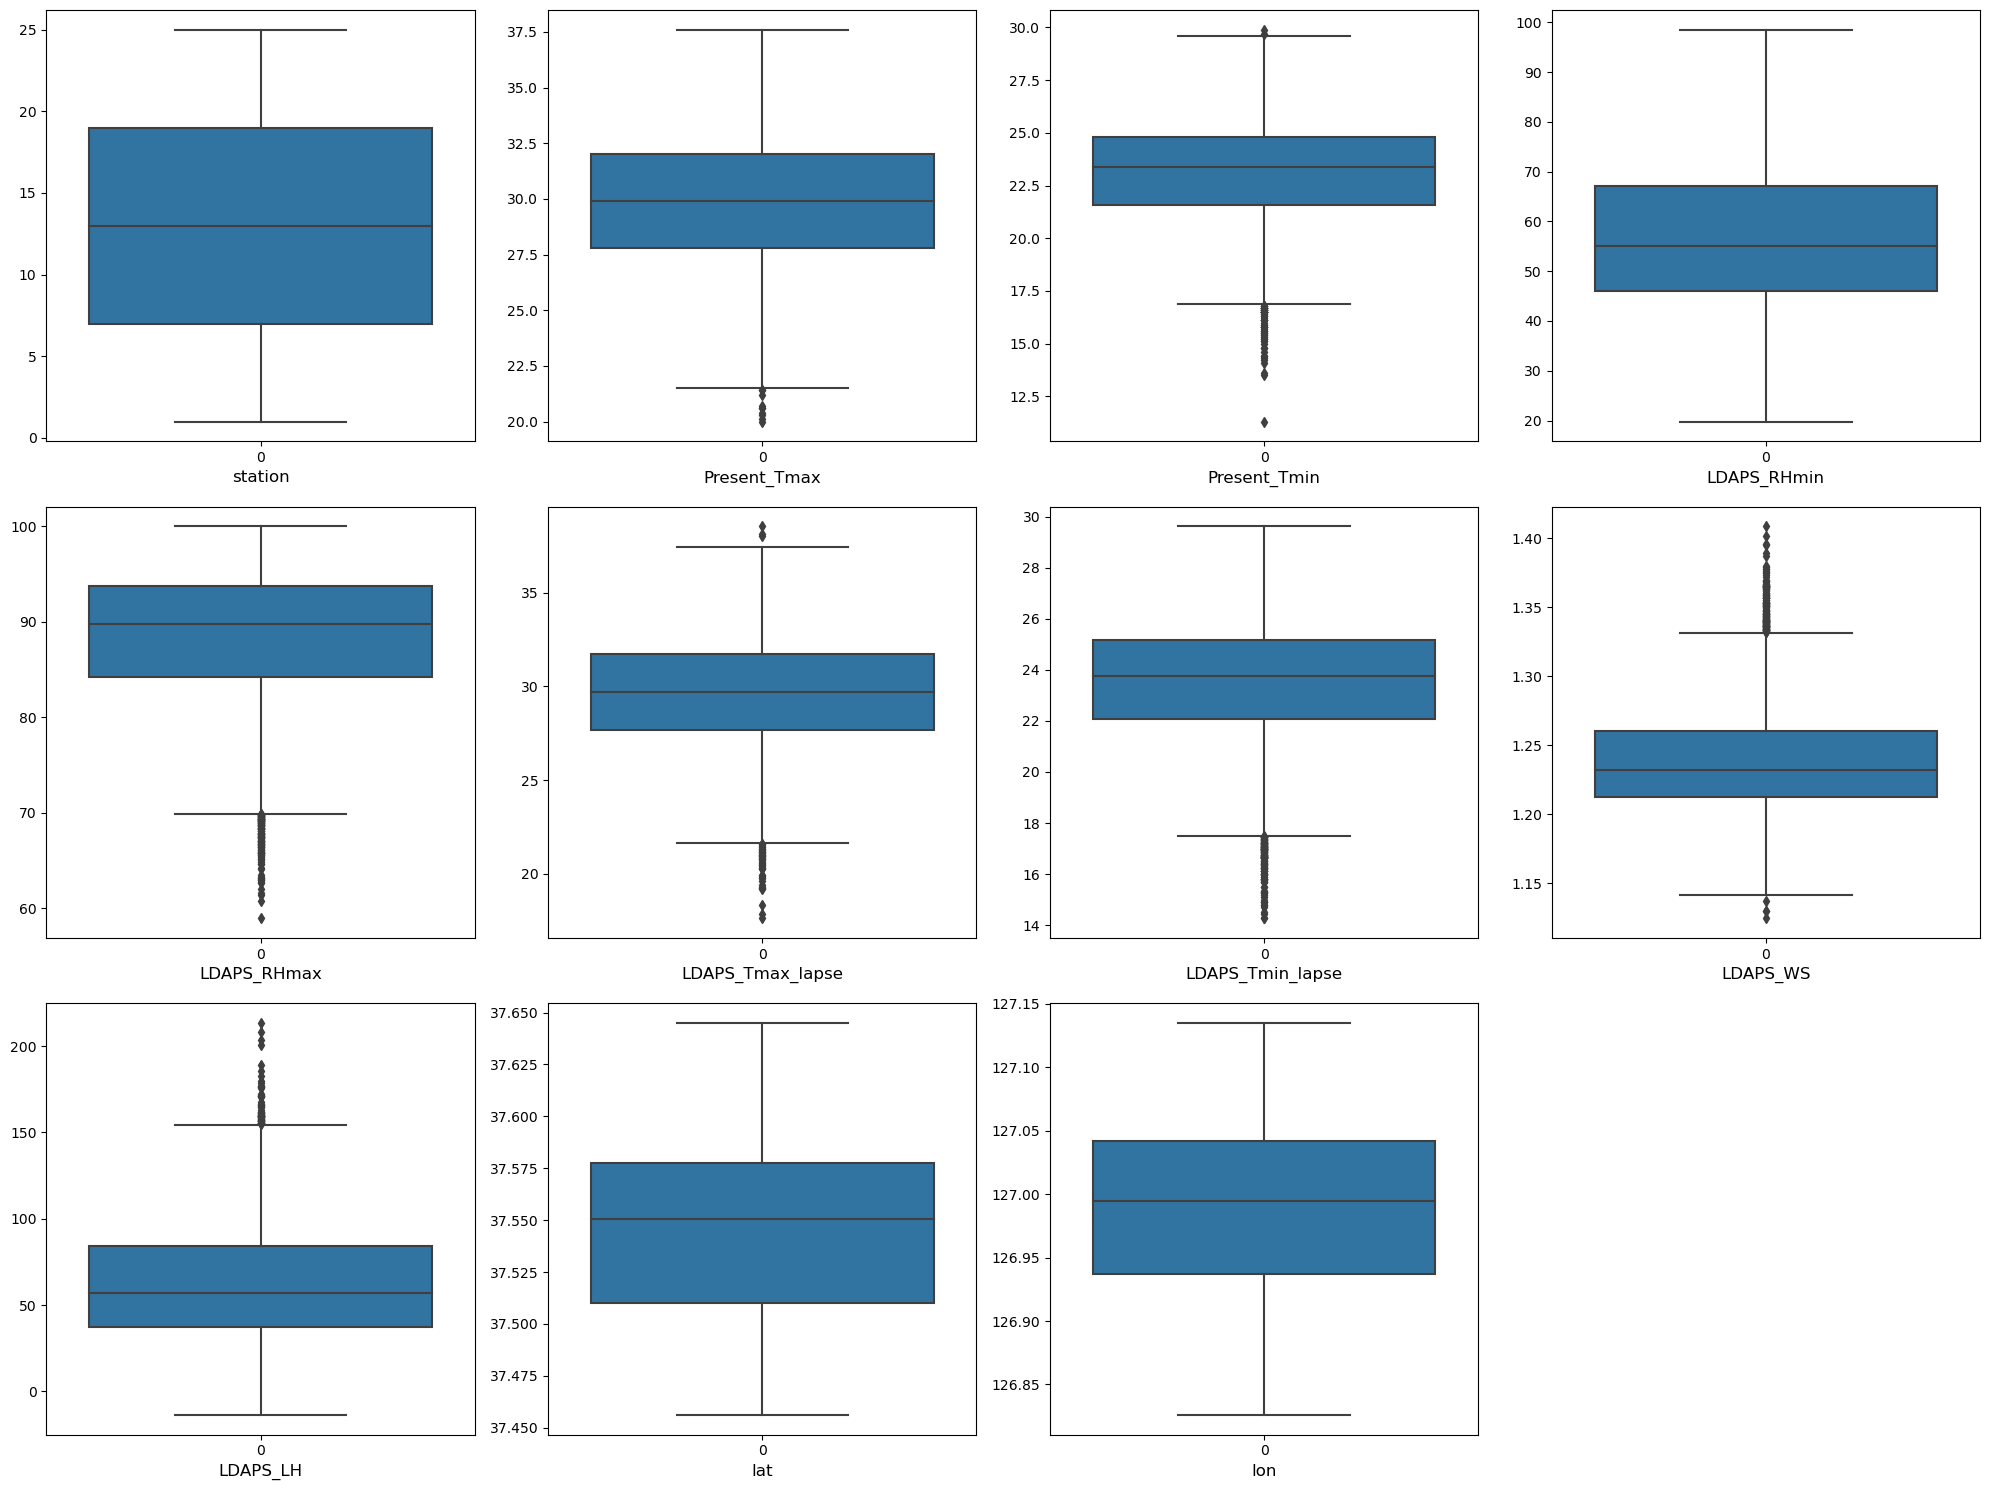

In [220]:
# check for outliers using boxplot

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=11:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(temp_df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [221]:
# outlier removal by z-score and saving the cleaned dataset as temp_df1

from scipy.stats import zscore

num=temp_df.select_dtypes(include=['int','float']).columns
num_cbrt=np.cbrt(temp_df[num])
z=zscore(num_cbrt)
abs_z=np.abs(z)
filter_z=(abs_z<3).all(axis=1)
temp_df1=temp_df[filter_z]
temp_df1.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,Slope,Solar radiation,Next_Tmax,Next_Tmin,date,month,year,loc_coord,cc,ppt
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.237755,69.451805,...,1.120534,5992.895996,29.1,21.2,30,6,2013,20,0.182617,0.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.213158,51.937448,...,0.928740,5869.312500,30.5,22.5,30,6,2013,21,0.191113,0.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.223377,20.573050,...,0.863209,5863.555664,31.1,23.9,30,6,2013,18,0.203257,0.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.212164,65.727144,...,1.108875,5856.964844,31.7,24.3,30,6,2013,24,0.184445,0.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.214176,107.965535,...,0.927001,5859.552246,31.2,22.5,30,6,2013,15,0.187579,0.0


In [222]:
print('Size of original dataset',temp.shape)
print('Size of dataset after cleaning and pre-processing',temp_df1.shape)
print('Number of rows removed after cleaning and pre-processing',temp.shape[0]-temp_df.shape[0])

Size of original dataset (7752, 25)
Size of dataset after cleaning and pre-processing (6982, 23)
Number of rows removed after cleaning and pre-processing 164


In [223]:
temp_df1.drop('Date',axis=1,inplace=True)

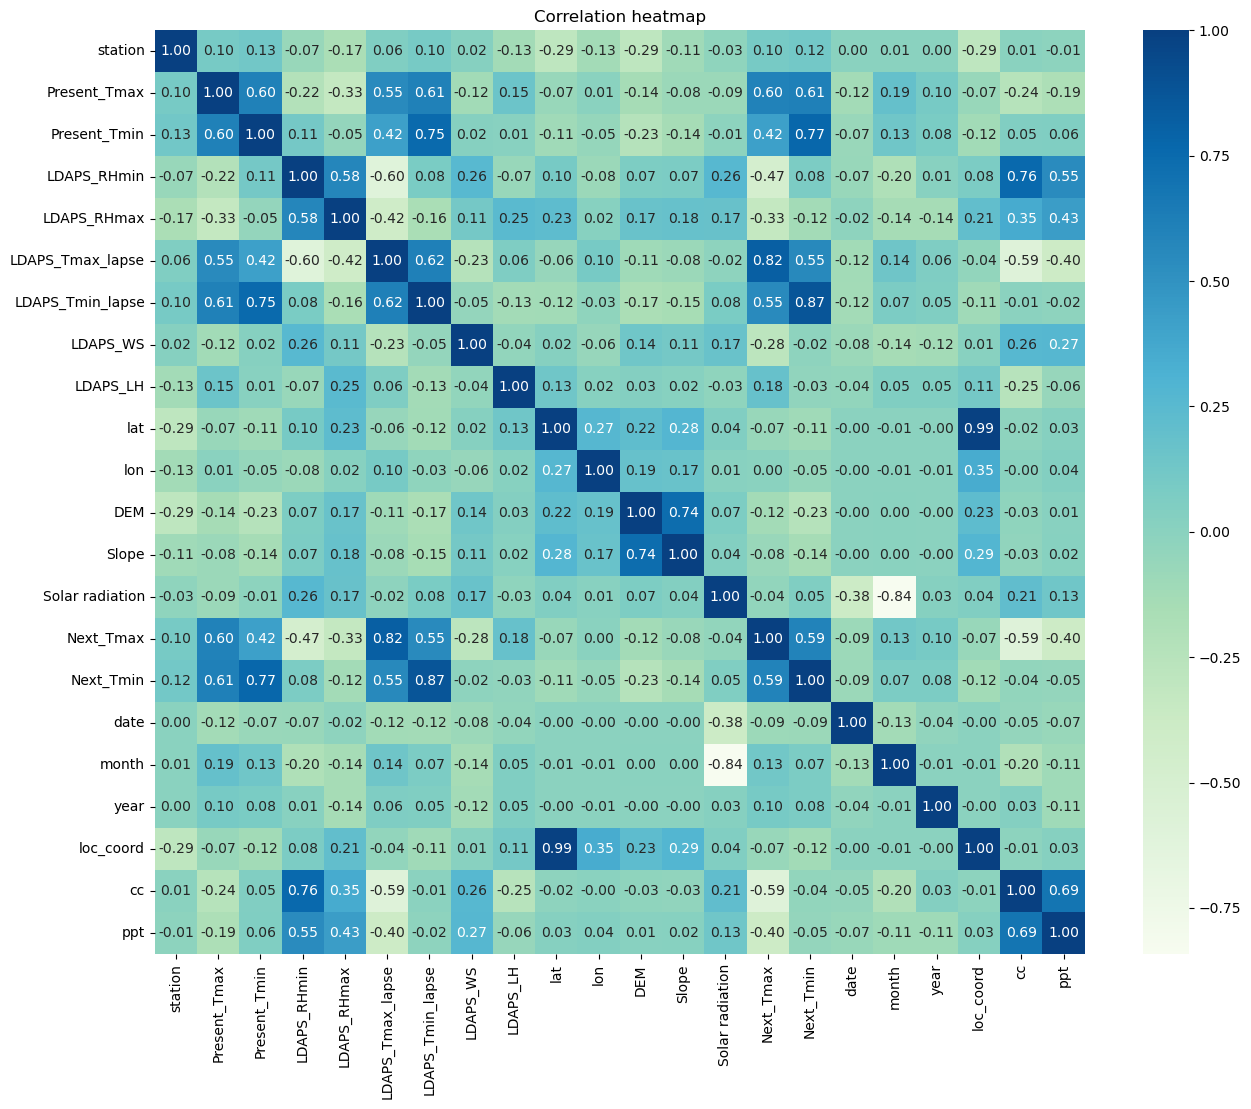

In [224]:
# check for correlation

cm= temp_df1.corr()
plt.figure(figsize=(15,12))

sns.heatmap(cm, annot=True,cmap='GnBu',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:

    Next_Tmax:
        High positive correlation - LDAPS_Tmax_lapse(+0.82), LDAPS_Tmin_lapse (+0.55), Present_Tmax(+0.60), Next_Tmin(+0.59), Present_Tmin(+0.42)
        High negative correlation - cc(-0.58), LDAPS_RHmin(-0.47), ppt(-0.40), LDAPS_RHmax(-0.33)
        
    Next_Tmin:
        High positive correlation - LDAPS_Tmin_lapse (+0.87), Present_Tmin(+0.77), Present_Tmax(+0.61), Next_Tmax(+0.59), LDAPS_Tmax_lapse(+0.55)
        
    Multicollinearity:
        loc_coord is highly correlated with lat as its a derived feature
        Avg precipitation is highly positively correlated with cloud cover and relative humidity 
        Present temperature is positively correlated with actual and LDAPS predicted next day temperature
        DEM and slope are positively correlated
        Maximum and minimum temperature and relative humidities are correlated with each other
        Month and Solar radiation are highly negatively correlated
        Cloud cover and precipitation are negatively correlated with max temperatures and positively correlated with relative humidity
               
We could use VIF score to eliminate highly correlated features so that multicollinearity is reduced in the dataset

# Feature Selection

# Feature Selection for regression model to predict minimum temperature for the next day 

In [225]:
# confirm multicollinearity by vif for Regression Model

x=temp_df1.drop(['Next_Tmin'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
18,loc_coord,75.418828
9,lat,72.219433
13,Solar radiation,36.418519
16,month,30.858153
15,date,9.529692
5,LDAPS_Tmax_lapse,8.396019
6,LDAPS_Tmin_lapse,6.422565
3,LDAPS_RHmin,6.176743
19,cc,4.597246
14,Next_Tmax,4.214763


we can drop 'loc_coord','Solar radiation' and check vif score again

In [226]:
# confirm multicollinearity by vif for Regression Model

x=temp_df1.drop(['Next_Tmin','loc_coord','Solar radiation'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
5,LDAPS_Tmax_lapse,8.079998
6,LDAPS_Tmin_lapse,6.195010
3,LDAPS_RHmin,5.943798
17,cc,4.583814
13,Next_Tmax,4.111041
2,Present_Tmin,2.901328
11,DEM,2.642259
1,Present_Tmax,2.503056
12,Slope,2.488566
4,LDAPS_RHmax,2.306107


Observation:

    VIF scores are below 10, so we can use the features to find the best using SelectKBest

In [227]:
# select top 10 features using SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif

x=temp_df1.drop(['Next_Tmin','loc_coord','Solar radiation'],axis=1)
y=temp_df1['Next_Tmin']

best=SelectKBest(score_func=f_classif,k=10)
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
selected_features=selectkbest.sort_values(by='Score',ascending=False).head(10)
display(selected_features)

,Features,Score
6,LDAPS_Tmin_lapse,174.144096
2,Present_Tmin,81.666351
1,Present_Tmax,34.611885
13,Next_Tmax,31.162823
5,LDAPS_Tmax_lapse,25.425865
15,month,3.882600
11,DEM,3.859686
4,LDAPS_RHmax,3.183254
3,LDAPS_RHmin,2.972971
17,cc,2.684993


In [279]:
# splitting data into features(x) and label(y)

x=temp_df1[['LDAPS_Tmin_lapse','Present_Tmin','Present_Tmax','Next_Tmax','LDAPS_Tmax_lapse',
                 'month','DEM','LDAPS_RHmax','LDAPS_RHmin','cc']]
y=temp_df1['Next_Tmin']

In [280]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5236, 10) (5236,) (1746, 10) (1746,)


# Feature Selection for regression model to predict maximum temperature for the next day 

In [230]:
# confirm multicollinearity by vif for Regression Model

x=temp_df1.drop(['Next_Tmax'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
18,loc_coord,76.284338
9,lat,72.871086
13,Solar radiation,36.164405
16,month,30.558209
15,date,9.503768
6,LDAPS_Tmin_lapse,8.303387
5,LDAPS_Tmax_lapse,6.983195
3,LDAPS_RHmin,6.155048
14,Next_Tmin,5.464701
19,cc,4.262688


we can drop 'loc_coord','Solar radiation' and check vif score again

In [231]:
# confirm multicollinearity by vif for Regression Model

x=temp_df1.drop(['Next_Tmax','loc_coord','Solar radiation'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
6,LDAPS_Tmin_lapse,7.968447
5,LDAPS_Tmax_lapse,6.810707
3,LDAPS_RHmin,5.969424
13,Next_Tmin,5.303394
17,cc,4.230585
2,Present_Tmin,3.139857
11,DEM,2.727118
12,Slope,2.515458
1,Present_Tmax,2.420254
4,LDAPS_RHmax,2.306953


Observation:

    VIF scores are below 10, so we can use the features to find the best using SelectKBest

In [232]:
# select top 10 features using SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif

x=temp_df1.drop(['Next_Tmax','loc_coord','Solar radiation'],axis=1)
y=temp_df1['Next_Tmax']

best=SelectKBest(score_func=f_classif,k=10)
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
selected_features=selectkbest.sort_values(by='Score',ascending=False).head(10)
display(selected_features)

,Features,Score
5,LDAPS_Tmax_lapse,90.796810
1,Present_Tmax,26.674330
17,cc,26.606130
13,Next_Tmin,26.280984
6,LDAPS_Tmin_lapse,22.038103
3,LDAPS_RHmin,14.196907
2,Present_Tmin,11.910762
18,ppt,10.910545
4,LDAPS_RHmax,6.393353
7,LDAPS_WS,5.221593


In [281]:
# splitting data into features(x) and label(y)

X=temp_df1[['LDAPS_Tmax_lapse','Present_Tmax','Present_Tmin','Next_Tmin','LDAPS_Tmin_lapse',
                 'LDAPS_WS','ppt','LDAPS_RHmin','LDAPS_RHmax','cc']]
Y=temp_df1['Next_Tmax']

In [282]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=67)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(5236, 10) (5236,) (1746, 10) (1746,)


# MODEL BUILDING & VALIDATION

# Model training for regression model to predict minimum temperature for the next day

In [283]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        cv=cross_val_score(model,x_scaled,y,cv=5).mean()
        print('R2 score: ',r2_score(y_test,y_pred2))


In [284]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8192277994001684


In [285]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.5782531469366607


In [286]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8192178904246389


In [287]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7572948773092376


In [288]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8835910653623964


In [289]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9037488642161093


In [292]:
# SVM

from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.869816241460174


In [293]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        
        y_train_pred= model.predict(x_train)
        tr=r2_score(y_train,y_train_pred)

        y_test_pred= model.predict(x_test)
        ts=r2_score(y_test,y_test_pred)
        
        mse=mean_squared_error(y_test,y_test_pred)
        mae=mean_absolute_error(y_test,y_test_pred)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(ts-cv)
        model_metrics.append({'Model':name, 'Train R2 score':tr,'Test R2 score':ts, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='Test R2 score' ,ascending=False)

In [294]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
5,XGBoost,0.987036,0.903749,0.496584,0.541025,0.760365,0.143384
4,Random Forest,0.983106,0.884448,0.596164,0.587317,0.762444,0.122003
6,SVM,0.882596,0.869816,0.671651,0.636522,0.762899,0.106917
0,Linear Regression,0.824046,0.819228,0.932649,0.760507,0.777940,0.041288
2,Ridge,0.824046,0.819218,0.932700,0.760539,0.777945,0.041273
3,Decision Tree,1.000000,0.763304,1.221174,0.809221,0.557788,0.205516
1,Lasso,0.584436,0.578253,2.175897,1.184755,0.716078,0.137825


Observation:

    We can select XGBoost model as it has the highest test r2 score of 0.90 and cross-validation of 0.76.  MSE and MAE is also lesser. 

In [295]:
# Hyperparameter tuning of XGBoost model

from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,250,50),
        'learning_rate': [0.01,0.05,0.08,0.1]}

rs= RandomizedSearchCV(estimator=xgbr,param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for XGBoost model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for XGBoost model: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1} 
 Best score: 0.8996878460649385


In [296]:
# Tuned XGBoost

xgbr_1=rs.best_estimator_
xgbr_1.fit(x_train,y_train)

score(xgbr_1,x_train,y_train,x_test,y_test,train=True)
score(xgbr_1,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9100912433530928


In [297]:
# compare tuned model with untuned one

models={'XGBoost':xgbr,'Tuned XGBoost':xgbr_1 }

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned XGBoost,0.990291,0.910091,0.463862,0.522096,0.773447,0.136644
0,XGBoost,0.987036,0.903749,0.496584,0.541025,0.760365,0.143384


Observation:

    We can select the tuned XGBoost model as the test r2 score has improved to 0.91 and cross-validation is 0.77 now.  MSE and MAE is also lesser. High test and train r2 score indicates that the model performs well on the data with minimal overfitting.
    
       * Train R2 score: 0.99
       * Test R2 score: 0.91
       * Cross Validation: 0.77
       * MSE: 0.46
       * MAE: 0.52

In [298]:
# Save Linear Regression model

pickle.dump(xgbr_1, open('Min_temp_prediction_xgbr_1_model.pkl','wb'))

In [299]:
# load model and view prediction vs actual region

Min_temp_prediction_model=pickle.load(open('Min_temp_prediction_xgbr_1_model.pkl','rb'))
y_pred=Min_temp_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.head()

,Predicted,Actual
3032,21.393961,20.0
878,25.691742,25.9
1948,23.395592,23.8
863,25.744015,26.1
1705,21.721653,21.4


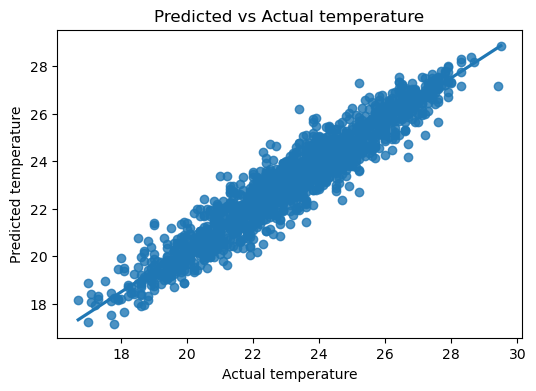

In [300]:
# plot Predicted vs Actual temperature

plt.figure(figsize=(6,4))
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual temperature')
plt.xlabel('Actual temperature')
plt.ylabel('Predicted temperature')
plt.show()

Observation:  

    The XGBoost model was able to predict next day minimum temperature very much closer to the actual temperature as observed by alignment of predicted and actual data points in the graph. 

# Model training for regression model to predict maximum temperature for the next day

In [301]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,X_train,Y_train,X_test,Y_test,train=True):
    model_metrics=[]
    if train:
        Y_pred1= model.predict(X_train)
    else:
        Y_pred2= model.predict(X_test)
        r2=r2_score(Y_test,Y_pred2)
        cv=cross_val_score(model,X_scaled,Y,cv=5).mean()
        print('R2 score: ',r2_score(Y_test,Y_pred2))

In [302]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
score(lr,X_train,Y_train,X_test,Y_test,train=True)
score(lr,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.7782762799089304


In [303]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,Y_train)
score(lasso,X_train,Y_train,X_test,Y_test,train=True)
score(lasso,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.5514887990440512


In [304]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)
score(ridge,X_train,Y_train,X_test,Y_test,train=True)
score(ridge,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.7782653519100684


In [305]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
score(dtr,X_train,Y_train,X_test,Y_test,train=True)
score(dtr,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.778170016704224


In [306]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
score(rfr,X_train,Y_train,X_test,Y_test,train=True)
score(rfr,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.878020274182976


In [307]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(X_train,Y_train)

score(xgbr,X_train,Y_train,X_test,Y_test,train=True)
score(xgbr,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.8782627551451374


In [308]:
# SVM

from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.869816241460174


In [309]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(X_train,Y_train)
        
        Y_train_pred= model.predict(X_train)
        tr=r2_score(Y_train,Y_train_pred)

        Y_test_pred= model.predict(X_test)
        ts=r2_score(Y_test,Y_test_pred)
        
        mse=mean_squared_error(Y_test,Y_test_pred)
        mae=mean_absolute_error(Y_test,Y_test_pred)
        cv=cross_val_score(model,X,Y,cv=5).mean()
        diff = abs(tr-cv)
        model_metrics.append({'Model':name, 'Test R2 score':tr,'Train R2 score':ts, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='Test R2 score' ,ascending=False)

In [310]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,Test R2 score,Train R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
3,Decision Tree,1.000000,0.773812,2.116260,1.056873,0.462071,0.537929
4,Random Forest,0.982192,0.879171,1.130496,0.791254,0.680505,0.301687
5,XGBoost,0.981881,0.878263,1.138995,0.808252,0.643748,0.338133
6,SVM,0.856135,0.844068,1.458931,0.916414,0.663323,0.192812
0,Linear Regression,0.767382,0.778276,2.074487,1.095102,0.715990,0.051393
2,Ridge,0.767382,0.778265,2.074589,1.095127,0.716681,0.050701
1,Lasso,0.555685,0.551489,4.196351,1.642669,0.642004,0.086320


Observation:

    We can select Random Forest model as it has the high test r2 score of 0.98 and cross-validation of 0.68.  MSE and MAE is also lesser. There is minimal overfitting.
       
       
    We do not choose Decision tree as the big difference between test and train r2 scores might indicate overfitting and also the CV score is less and errors are high for decision tree.

In [312]:
# Hyperparameter tuning of the selected model (Random Forest) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250], 'max_depth':range(1,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

rs=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 250, 'min_samples_leaf': 1, 'max_leaf_nodes': 15, 'max_depth': 16} and best score is : nan


In [317]:
# Tuned Random Forest model (with manual tuning also)

rf1=RandomForestRegressor(n_estimators= 350, min_samples_leaf= 4, max_leaf_nodes= 15, max_depth=15)

rf1.fit(X_train,Y_train)

score(rf1,X_train,Y_train,X_test,Y_test,train=True)
score(rf1,X_train,Y_train,X_test,Y_test,train=False)

R2 score:  0.7552775100854984


In [318]:
# compare tuned model with untuned one

models={'Random Forest':rfr,'Tuned Random Forest ':rf1 }

evaluation(models)

,Model,Test R2 score,Train R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
0,Random Forest,0.981717,0.878926,1.132788,0.794526,0.680208,0.301509
1,Tuned Random Forest,0.768970,0.756143,2.281570,1.172656,0.678504,0.090467


Hyperparameter tuning has not improved the scores.
So, we can select the untuned Random Forest model as it has the high test r2 score and cross-validation than the tuned model.  MSE and MAE is also lesser. There is minimal overfitting.

       * Test R2 score: 0.98
       * Train R2 score: 0.88
       * Cross Validation: 0.68
       * MSE: 1.13
       * MAE: 0.79

In [319]:
# Save Random Forest model

pickle.dump(rfr, open('Max_temp_prediction_rfr_model.pkl','wb'))

In [320]:
# load model and view prediction vs actual region

Max_temp_prediction_model=pickle.load(open('Max_temp_prediction_rfr_model.pkl','rb'))
Y_pred=Max_temp_prediction_model.predict(X_test)

result=pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
result.head()

,Predicted,Actual
3032,30.149,30.7
878,33.044,30.7
1948,31.665,31.9
863,32.689,32.2
1705,33.261,34.0


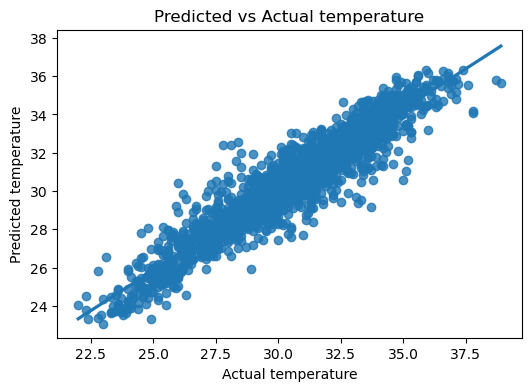

In [321]:
# plot Predicted vs Actual temperature

plt.figure(figsize=(6,4))
sns.regplot(x=Y_test,y=Y_pred,data=result)
plt.title('Predicted vs Actual temperature')
plt.xlabel('Actual temperature')
plt.ylabel('Predicted temperature')
plt.show()

Observation:  

    The Linear Regression model was able to predict next day maximum temperature very much closer to the actual temperature as observed by alignment of predicted and actual data points in the graph.
    

# Overall Summary

The dataset on "Temperature Forecast" was used to analyse and build machine learning models to predict the minimum temperature for the next day and the maximum temperature for the next day (regression problems) based on different features.

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, renaming of columns, outlier removal, managing skewness; Number of rows removed after cleaning and pre-processing is 164
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering - creation of new columns such as year, month and location co-ordinates for data analysis and modelling purpose; scaling of data
4. Model training and evaluation- trained 7 models each for both the regression problems; evaluated the models using appropriate metrics to find the best model


# Data Insights

OVERALL ANALYSIS:

    * Over the years, maximum temperature was recorded on August,2016 and minimum on June, 2014
    * The temperature forecasted by the LDAPS model was close to the actual temperature recorded during 2013-2014 and later started varying. Much difference was recorded in 201-2016 and it almost started stabilizing by the beginning of 2017.
    * Average cloud cover forecasted by LDAPS model was highest in 2013 and lowest in 2015
    * Average precipitation forecasted by LDAPS model was highest in 2013 and lowest in 2015
    * Solar radiation was alomst equally recieved across the years except during 2015 it started declining and 2016 recieved the lowest radiation
    * Wind speed was highest in 2013 after which there was a steep decline in 2014
    * Latent heat flux was least in 2013 and peaked during 2016


    * Highest temp of '37.6°C' was recorded at station '18' on 11-08-2016.
    * Minimum temperature of the day was '26.8°C'
    * Location co-ordinates of the area/station which recorded the highest temperature is 37.4832,127.024 and the slope of the station is 1.2313 Â°
    * Average cloud cover was 31.75% and average precipitation was 0.0 indicating no rainfall on 11-08-2016
    
    * Correlation analysis revealed that previous day temperatures influence the temperature for the next day as they are positively correlated.
    * As cloud cover and precipitation are more, temperature tends to decrease and relative humidity tends to increase as per the correlation analysis.
    

YEAR-WISE ANALYSIS:
    
    * Over the years, maximum temperature was recorded on August,2016 and minimum on June, 2014
    
    * August 2016 had high average temperature range (24.57 to 32.14°C) and high incoming solar radiation of 4941.71 W/m², which can explain the hottest temperature during that period. 
    
    * June 2014 had low average temperature range (20.87 to 29.48°C) and high incoming solar radiation of 5874.69 W/m². The low temperature makes it the coolest period in the whole dataset. Low cloud cover (7.59%) and low precipitation(0.72%) rate can explain the high incoming solar radiation during that period. 
    
    * The LDAPS model was able to predict the next day temperatures successfully in the beginning but significant deviations were observed from late 2014 to 2016 which can be due to the changing weather patterns or due to the limitations of the model.
    

# Selected Regression models

* Predict minimum temperature for the next day 

    XGBoost model was found to be the best model for the regression task to predict the minimum temperature for the next day with 91% test r2 score explaining 91% variance of the data. It has the highest r2 score  and cross-validation score.  MSE and MAE is also lesser. High test and train r2 score indicates that the model performs well on the data with minimal overfitting.
    
       * Test R2 score: 0.91
       * Train R2 score: 0.99
       * Cross Validation: 0.77
       * MSE: 0.46
       * MAE: 0.52
   
* Predict maximum temperature for the next day 

    Random Forest model was found to be the best model for the regression task to predict the minimum temperature for the next day with 98% test r2 score explaining 98% variance of the data. It has the highest r2 score and cross-validation score.  MSE and MAE is also lesser. There is minimal overfitting. 
    
       * Test R2 score: 0.98
       * Train R2 score: 0.88
       * Cross Validation: 0.68
       * MSE: 1.13
       * MAE: 0.79 
